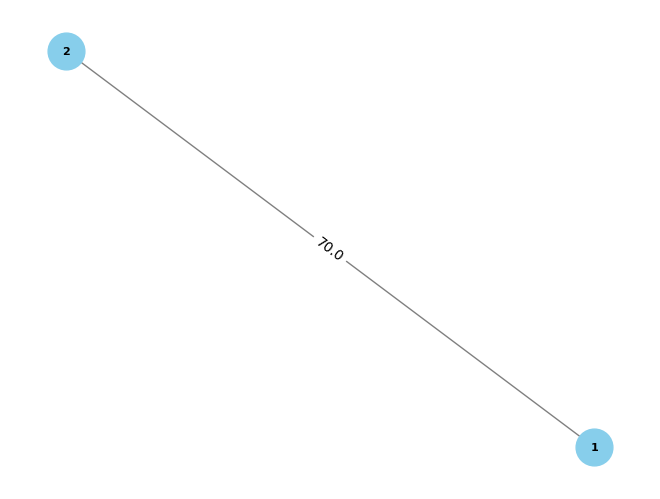


Pilihan Menu:
1. Rute Terdekat
2. Ubah Bobot Edge
3. Informasi Graf
4. Matriks Adjacency
5. Matriks Incidence
6. Keluar
Matriks Incidence:
[[-1.]
 [ 1.]]


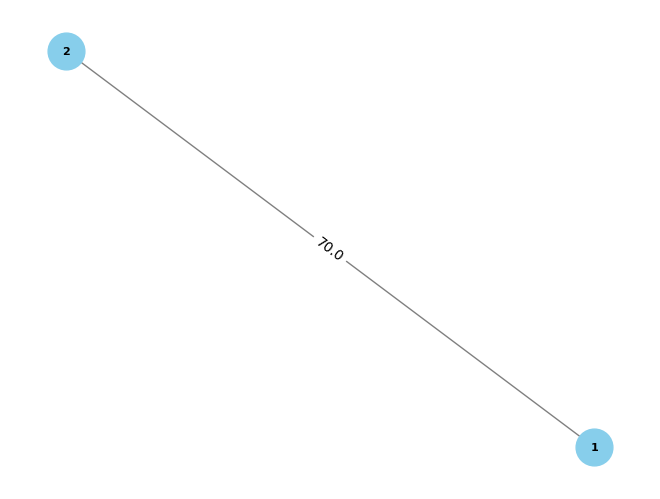


Pilihan Menu:
1. Rute Terdekat
2. Ubah Bobot Edge
3. Informasi Graf
4. Matriks Adjacency
5. Matriks Incidence
6. Keluar


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def shortest_path(graph, start, end):
    try:
        path = nx.shortest_path(graph, source=start, target=end, weight='distance', method='dijkstra')
        distance = nx.shortest_path_length(graph, source=start, target=end, weight='distance', method='dijkstra')
        print(f"Rute terdekat dari titik {start} ke titik {end}: {path}")
        print(f"Jarak: {distance}")
    except nx.NetworkXNoPath:
        print(f"Tidak ada rute dari titik {start} ke titik {end}")

def change_edge_weight(graph):
    edge = tuple(map(int, input("Masukkan edge yang ingin diubah bobotnya (misal, 1 2): ").split()))
    if graph.has_edge(*edge):
        try:
            new_weight = float(input("Masukkan bobot baru: "))
            graph[edge[0]][edge[1]]['distance'] = new_weight
            print(f"Bobot edge {edge} berhasil diubah.")
        except ValueError:
            print("Input tidak valid. Harap masukkan angka.")
    else:
        print(f"Edge {edge} tidak ditemukan.")

def display_adjacency_matrix(graph):
    adjacency_matrix = nx.adjacency_matrix(graph).todense()
    print("Matriks Adjacency:")
    print(adjacency_matrix)

def display_incidence_matrix(graph):
    incidence_matrix = nx.incidence_matrix(graph, oriented=True).todense()
    print("Matriks Incidence:")
    print(incidence_matrix)

# Input jumlah node dari pengguna
try:
    num_nodes = int(input("Masukkan jumlah node: "))
except ValueError:
    print("Input tidak valid. Harap masukkan angka.")
    exit()

# Input node dari pengguna
try:
    nodes = list(map(int, input("Masukkan node (pisahkan dengan spasi): ").split()))
except ValueError:
    print("Input tidak valid. Harap masukkan angka.")
    exit()

# Buat graf
G = nx.Graph()

# Tambahkan node
G.add_nodes_from(nodes)

# Input edge dan atribut jarak dari pengguna
edges_with_distances = []
try:
    num_edges = int(input("Masukkan jumlah edge: "))
except ValueError:
    print("Input tidak valid. Harap masukkan angka.")
    exit()

for i in range(num_edges):
    try:
        edge = tuple(map(int, input(f"Masukkan edge ke-{i + 1} (misal, 1 2): ").split()))
        distance = float(input(f"Masukkan jarak untuk edge {edge}: "))
        edges_with_distances.append((*edge, {'distance': distance}))
    except ValueError:
        print("Input tidak valid. Harap masukkan angka.")
        exit()

# Tambahkan edge dengan atribut jarak
G.add_edges_from(edges_with_distances)

# Visualisasikan graf dengan jarak ditampilkan
pos = nx.spring_layout(G)  # Menentukan posisi node

while True:
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, font_color='black', edge_color='gray')

    # Menambahkan label jarak pada setiap edge
    labels = nx.get_edge_attributes(G, 'distance')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.show()

    # Pilihan menu switch case
    print("\nPilihan Menu:")
    print("1. Rute Terdekat")
    print("2. Ubah Bobot Edge")
    print("3. Informasi Graf")
    print("4. Matriks Adjacency")
    print("5. Matriks Incidence")
    print("6. Keluar")

    choice = input("Masukkan nomor menu yang dipilih: ")

    if choice == '1':
        start_node = int(input("Masukkan titik awal: "))
        end_node = int(input("Masukkan titik tujuan: "))
        shortest_path(G, start_node, end_node)
    elif choice == '2':
        change_edge_weight(G)
    elif choice == '3':
        print(f"Informasi Graf:")
        print(f"Jumlah Node: {G.number_of_nodes()}")
        print(f"Jumlah Edge: {G.number_of_edges()}")
    elif choice == '4':
        display_adjacency_matrix(G)
    elif choice == '5':
        display_incidence_matrix(G)
    elif choice == '6':
        print("Semoga Harimu Menyenangkan :)")
        break
    else:
        print("Pilihan tidak valid. Silakan pilih kembali.")
